<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20trail1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [3]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [6]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


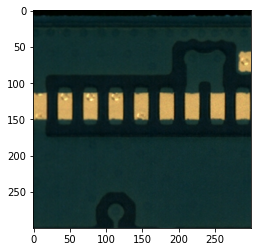

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [9]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [10]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
51.719208
54.341225
3.740821 3.740821
-0.951749 -0.951749


In [11]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.


[0. 1.]


In [12]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [26]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))
x0=keras.layers.ZeroPadding2D(padding=(3, 3))(input1)
x1 = Conv2D(300,(7,7),strides=(2,2) ,activation='relu')(x0)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)
x5= Conv2D(200,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)
x9= Conv2D(100,(2,2),strides=(2,2) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= MaxPooling2D((3, 3), strides=(2, 2))(x11)
x12=keras.layers.ZeroPadding2D(padding=(3, 3))(x12)
x13= Conv2D(100,(2,2),strides=(2,2) ,activation='relu')(x12)
x14=keras.layers.BatchNormalization(axis = 3)(x13)
x15= Activation('relu')(x14)
x16= MaxPooling2D((3, 3), strides=(2, 2))(x15)


x17=keras.layers.ZeroPadding2D(padding=(2, 2))(x16)
x18= Conv2D(100,(2,2),strides=(1,1) ,activation='relu')(x17)
x19=keras.layers.BatchNormalization(axis = 3)(x18)
x20= Activation('relu')(x19)
x21= MaxPooling2D((3, 3), strides=(1, 1))(x20)




o=keras.layers.Flatten()(x21)
out = keras.layers.Dense(100,activation="relu")(o)
out=keras.layers.Dense(50,activation="relu")(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 306, 306, 3)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 150, 150, 300)     44400     
_________________________________________________________________
batch_normalization_25 (Batc (None, 150, 150, 300)     1200      
_________________________________________________________________
activation_25 (Activation)   (None, 150, 150, 300)     0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 200)       2402

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [28]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [29]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=20,epochs=10, verbose=1)

Train on 1430 samples, validate on 358 samples
Epoch 1/10
1430/1430 [==============================] - 301s 211ms/step - loss: 0.2821 - acc: 0.9217 - val_loss: 0.1736 - val_acc: 0.9553
Epoch 2/10
1430/1430 [==============================] - 297s 208ms/step - loss: 0.1904 - acc: 0.9385 - val_loss: 0.1565 - val_acc: 0.9609
Epoch 3/10
1430/1430 [==============================] - 298s 209ms/step - loss: 0.1518 - acc: 0.9455 - val_loss: 0.1503 - val_acc: 0.9609
Epoch 4/10
1430/1430 [==============================] - 299s 209ms/step - loss: 0.1307 - acc: 0.9490 - val_loss: 0.1644 - val_acc: 0.9469
Epoch 5/10
1430/1430 [==============================] - 297s 208ms/step - loss: 0.1160 - acc: 0.9566 - val_loss: 0.1459 - val_acc: 0.9553
Epoch 6/10
1430/1430 [==============================] - 299s 209ms/step - loss: 0.1018 - acc: 0.9601 - val_loss: 0.1329 - val_acc: 0.9525
Epoch 7/10
1430/1430 [==============================] - 301s 211ms/step - loss: 0.0644 - acc: 0.9769 - val_loss: 0.1332 - val

In [17]:
model.evaluate(xtest,ytest)

881/881 [==============================] - 71s 81ms/step


[0.2259623430918788, 0.9409761634506243]

In [18]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.09      0.16        54
     class 1       0.94      1.00      0.97       827

    accuracy                           0.94       881
   macro avg       0.78      0.54      0.57       881
weighted avg       0.92      0.94      0.92       881



In [19]:
model.evaluate(xtrain,ytrain)

1788/1788 [==============================] - 144s 81ms/step


[0.03316850045391711, 0.9927293064876958]

In [20]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.88      0.93        95
     class 1       0.99      1.00      1.00      1693

    accuracy                           0.99      1788
   macro avg       0.99      0.94      0.96      1788
weighted avg       0.99      0.99      0.99      1788

